# ML using Python Capstone 4

---



![Machine Learning Tensorflow](https://blog.ovhcloud.com/wp-content/uploads/2022/01/IMG_0834-1024x537.jpeg)


![Image Description](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQk6EaO24dkeosV8rIV42LZChwSOxMvnEXyyA&usqp=CAU)


The **role** : The automatic sound classification model developer

This role involves building and training the automatic sound classification model specifically designed to recognize and predictiong sound classification.

The Machine learning framework used is [TensorFlow](https://https://www.tensorflow.org/) developed by Google. It provides a comprehensive ecosystem of tools, libraries, and resources for building and deploying machine learning models.

![TensorFlow](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQkhBt3Y6tvnsG0QYdD_7Xd6vq7oD5vmvheJtCHe2guptmJ0WqDez6G46ACS0w2U9RabXA&usqp=CAU)


# Predictions Sound Classifiction

*Datasource- google's research centre- AudioSet-YouTube corpus*

The AudioSet have millions of audio clips with labels corresponding to various sound events and serves as a valuable resource for training and evaluating audio classification models.

![Audio classification](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*7YbBTqwF2dMAuQwOrD_hXQ.png)


The machine learning infrastructure model is YAMNet (Yet Another Mulilabel Network) .
YAMNet is a deep neural network that predicts 521 audio event classes from the AudioSet-YouTube corpus

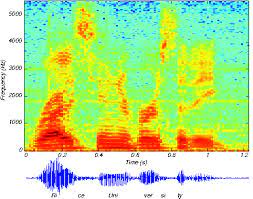


YAMNet employs convolutional layers as a key component in its architecture to process audio signals and extract relevant features for sound classification.

In YAMNet, the convolutional layers act as filters that convolve with the input audio spectrogram, which is a visual representation of the audio signal's frequency content over time. These convolutional filters capture various patterns and features present in the audio data at different scales or receptive fields.

During the training phase, YAMNet learns the optimal **weights** (filter coefficients) for these convolutional filters through **backpropagation** and **gradient descent**. ***The goal is to train the network to automatically learn discriminative features that can effectively distinguish different sound events.***

By applying convolutional operations, YAMNet can extract local **patterns** and **spatial relationships** in the audio spectrogram. **This allows the model to capture meaningful representations of the audio data that are relevant for classification tasks**.
."

from IPython.display import YouTubeVideo

YouTubeVideo('https://www.youtube.com/watch?v=YRhxdVk_sIs')



In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import csv

import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile

1. ***import tensorflow as tf***: This imports the TensorFlow library, which is a popular open-source framework for building and training machine learning models.

3. ***import tensorflow_hub as hub***: This imports the TensorFlow Hub library, which is a repository of pre-trained machine learning models that can be easily integrated into TensorFlow projects.

4. ***import numpy as np***: This imports the NumPy library, which is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

5. i***mport csv***: This imports the CSV module, which provides functionality for reading and writing CSV (Comma Separated Values) files.

6. ***import matplotlib.pyplot*** as plt: This imports the pyplot module from the Matplotlib library. Matplotlib is a plotting library for Python, and pyplot provides a MATLAB-like interface for creating visualizations and plots.

7. ***from IPython.display import Audio***: IPython is an interactive computing environment, and the display module provides utilities for displaying rich media, including audio.

8. ***from scipy.io import wavfile***: This imports the wavfile module from the scipy.io library. Scipy is a scientific computing library for Python, and the wavfile module provides functions for reading and writing WAV files, which are commonly used for storing audio data.


In [2]:
# Load the model.
model = hub.load('https://tfhub.dev/google/yamnet/1')

This line loads a pre-trained machine **learning model** called "YAMNet" (Yet Another Multilabel Network) on the TensorFlow Hub website.The number 1 in the URL represents the version of the model being loaded.

In [3]:
# Find the name of the class with the top score when mean-aggregated across frames.
def class_names_from_csv(class_map_csv_text):
  """Returns list of class names corresponding to score vector."""
  class_names = []
  with tf.io.gfile.GFile(class_map_csv_text) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
      class_names.append(row['display_name'])

  return class_names

class_map_path = model.class_map_path().numpy()
class_names = class_names_from_csv(class_map_path)

this code is used to extract the class names associated with a pre-trained model by reading a CSV file that contains the mapping between class labels and their corresponding display names. The class_names_from_csv function provides a convenient way to retrieve the class names from the CSV file, and the resulting list of class names is stored in the class_names variable.

In [4]:
def ensure_sample_rate(original_sample_rate, waveform,
                       desired_sample_rate=16000):
  """Resample waveform if required."""
  if original_sample_rate != desired_sample_rate:
    desired_length = int(round(float(len(waveform)) /
                               original_sample_rate * desired_sample_rate))
    waveform = scipy.signal.resample(waveform, desired_length)
  return desired_sample_rate, waveform

this function is designed to check if the sample rate of an audio waveform matches a desired sample rate. If they don't match, the waveform is resampled using the scipy.signal.resample function to match the desired sample rate of (16K), otherwise it would affect the model's results.

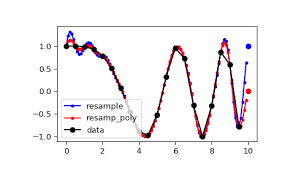


In [5]:
!curl -O https://storage.googleapis.com/audioset/golden_whistle.wav

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  151k  100  151k    0     0  1566k      0 --:--:-- --:--:-- --:--:-- 1582k




Audio file will be a mono wav file at 16kHz sample rate.

In [6]:
# wav_file_name = 'golden_whistle.wav'
wav_file_name = 'golden_whistle.wav'
sample_rate, wav_data = wavfile.read(wav_file_name, 'rb')
sample_rate, wav_data = ensure_sample_rate(sample_rate, wav_data)

# Show some basic information about the audio.
duration = len(wav_data)/sample_rate
print(f'Sample rate: {sample_rate} Hz')
print(f'Total duration: {duration:.2f}s')
print(f'Size of the input: {len(wav_data)}')

# Listening to the wav file.
Audio(wav_data, rate=sample_rate)

Sample rate: 16000 Hz
Total duration: 4.86s
Size of the input: 77760


![whistle](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTSqYC2QyR43kRSUuMHUvcusCOhQy-y5SL5Ew&usqp=CAU)


The wav_data have been to be normalized to values in [-1.0, 1.0] (as stated in the model's documentation).


In [7]:
waveform = wav_data / tf.int16.max

Now the fun executing the model part !
Making use of the data already prepared, i call the model and get the :
scores embedding and the spectrogram !

The score is the main result that I will use .

The spectrogram will be use to do some visuallizations later !

In [8]:
# Run the model, check the output.
scores, embeddings, spectrogram = model(waveform)

In [9]:
scores_np = scores.numpy()
spectrogram_np = spectrogram.numpy()
infered_class = class_names[scores_np.mean(axis=0).argmax()]
print(f'The main sound is: {infered_class}')

The main sound is: Whistling


Let's now use of YAMNet useful features to load and use it for displays visuals !
The waveform
The spectrogram
Top classes inferred

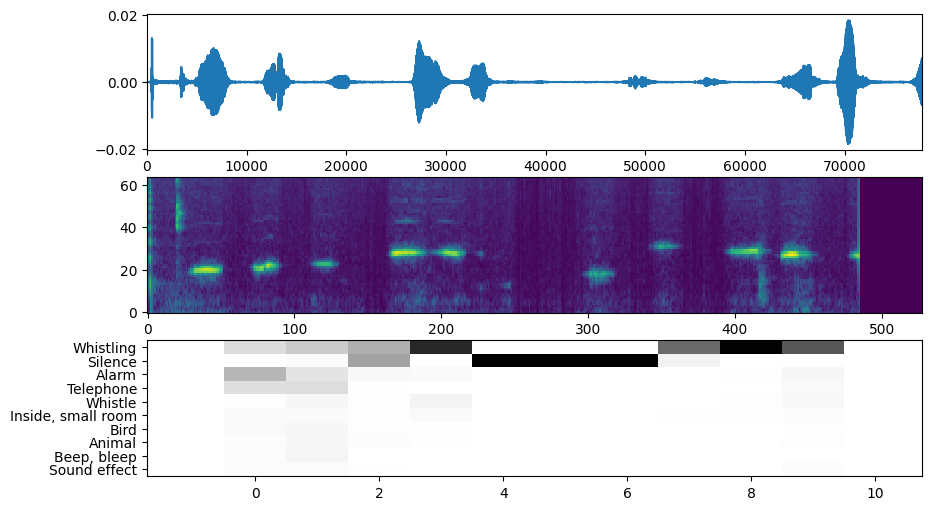

In [10]:
plt.figure(figsize=(10, 6))

# Plot the waveform.
plt.subplot(3, 1, 1)
plt.plot(waveform)
plt.xlim([0, len(waveform)])

# Plot the log-mel spectrogram (returned by the model).
plt.subplot(3, 1, 2)
plt.imshow(spectrogram_np.T, aspect='auto', interpolation='nearest', origin='lower')

# Plot and label the model output scores for the top-scoring classes.
mean_scores = np.mean(scores, axis=0)
top_n = 10
top_class_indices = np.argsort(mean_scores)[::-1][:top_n]
plt.subplot(3, 1, 3)
plt.imshow(scores_np[:, top_class_indices].T, aspect='auto', interpolation='nearest', cmap='gray_r')

# patch_padding = (PATCH_WINDOW_SECONDS / 2) / PATCH_HOP_SECONDS
# values from the model documentation
patch_padding = (0.025 / 2) / 0.01
plt.xlim([-patch_padding-0.5, scores.shape[0] + patch_padding-0.5])
# Label the top_N classes.
yticks = range(0, top_n, 1)
plt.yticks(yticks, [class_names[top_class_indices[x]] for x in yticks])
_ = plt.ylim(-0.5 + np.array([top_n, 0]))

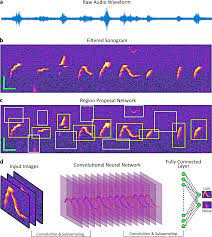


 The convolution kernel, specifically a smoothing filter. A convolution kernel is a small matrix or array of values that is used to perform a convolution operation on an input signal or image.

In this case, the kernel is defined as a list [0.25, 0.5, 0.25]. Each element in the list represents the **weight** or **coefficient **assigned to a specific **pixel** or **sample** during the convolution operation. The values [0.25, 0.5, 0.25] indicate that the central pixel or sample has the highest weight (0.5), while the neighboring pixels or samples have lower weights (0.25).

When applying this kernel during the convolution operation, the input signal or image will be convolved with the kernel by **sliding** the kernel over each pixel or sample of the input and calculating the weighted sum. This particular kernel, [0.25, 0.5, 0.25], is commonly used as a simple smoothing filter that helps to reduce **noise** and blur the image slightly.

The resulting convolved output will be a smoothed version of the original input, where the values of neighboring pixels or samples are taken into account to compute the output value for each location.

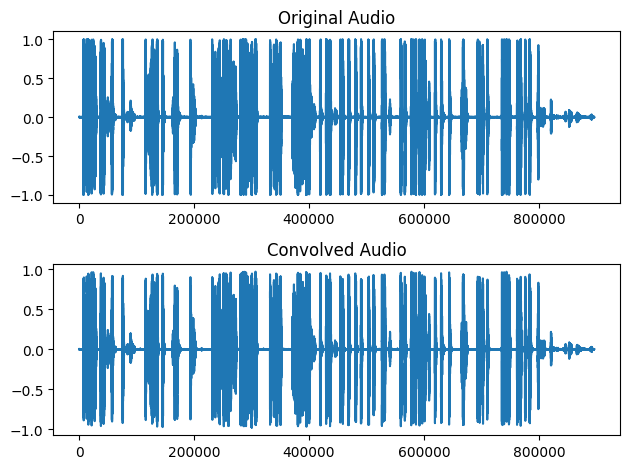

In [11]:
import scipy

from scipy import signal

!pip install scipy


import librosa
import matplotlib.pyplot as plt

# Load the audio file
audio_file = 'dog.wav'
audio, sr = librosa.load(audio_file, sr=None)

# Define the convolution kernel (e.g., a smoothing filter)
kernel = [0.25, 0.5, 0.25]

# Perform convolution
convolved_audio = scipy.signal.convolve(audio, kernel, mode='same')

# Plot the original audio waveform
plt.subplot(2, 1, 1)
plt.plot(audio)
plt.title('Original Audio')

# Plot the convolved audio waveform
plt.subplot(2, 1, 2)
plt.plot(convolved_audio)
plt.title('Convolved Audio')

# Show the plots
plt.tight_layout()
plt.show()


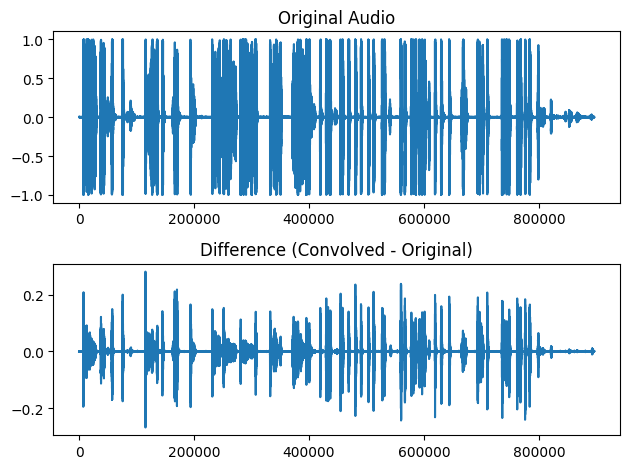

In [12]:
import scipy
from scipy import signal
import librosa
import matplotlib.pyplot as plt

# Load the audio file
audio_file = 'dog.wav'
audio, sr = librosa.load(audio_file, sr=None)

# Define the convolution kernel (e.g., a smoothing filter)
kernel = [0.25, 0.5, 0.25]

# Perform convolution
convolved_audio = scipy.signal.convolve(audio, kernel, mode='same')

# Plot the original audio waveform
plt.subplot(2, 1, 1)
plt.plot(audio)
plt.title('Original Audio')

# Plot the convolved audio waveform
plt.subplot(2, 1, 2)
plt.plot(convolved_audio - audio)  # Plot the difference between convolved and original audio
plt.title('Difference (Convolved - Original)')

# Show the plots
plt.tight_layout()
plt.show()


Difference between original and convoled plot!

Next up ! Another enternal wav file imported into colab for analysis!

[audio sound source](https://freesound.org/)


In [13]:
# wav_file_name = 'dog.wav'
wav_file_name = 'dog.wav'
sample_rate, wav_data = wavfile.read(wav_file_name, 'rb')
sample_rate, wav_data = ensure_sample_rate(sample_rate, wav_data)

# Show some basic information about the audio.
duration = len(wav_data)/sample_rate
print(f'Sample rate: {sample_rate} Hz')
print(f'Total duration: {duration:.2f}s')
print(f'Size of the input: {len(wav_data)}')

# Listening to the wav file.
Audio(wav_data, rate=sample_rate)

Sample rate: 16000 Hz
Total duration: 81.29s
Size of the input: 1300689


![dog](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcStYddOJEy4Otbiwg-Ut8uYa3aLqJHcwYccJA&usqp=CAU)


In [14]:
waveform = wav_data / tf.int16.max

Fun part !

In [15]:
# Run the model, check the output.
scores, embeddings, spectrogram = model(waveform)

In [16]:
scores_np = scores.numpy()
spectrogram_np = spectrogram.numpy()
infered_class = class_names[scores_np.mean(axis=0).argmax()]
print(f'The main sound is: {infered_class}')

The main sound is: Domestic animals, pets


Let's now use of YAMNet useful features to loaded n use for displays visuals ! The waveform The spectrogram Top classes inferred

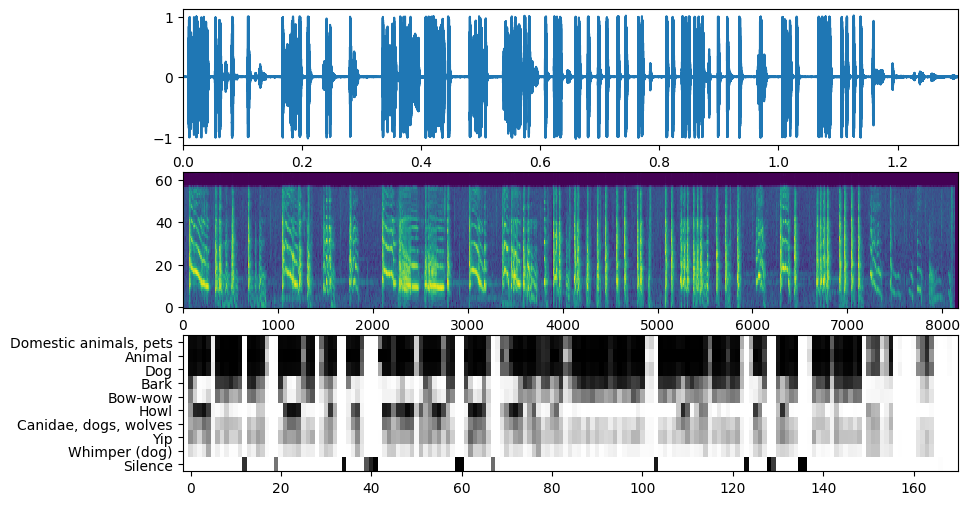

In [17]:
plt.figure(figsize=(10, 6))

# Plot the waveform.
plt.subplot(3, 1, 1)
plt.plot(waveform)
plt.xlim([0, len(waveform)])

# Plot the log-mel spectrogram (returned by the model).
plt.subplot(3, 1, 2)
plt.imshow(spectrogram_np.T, aspect='auto', interpolation='nearest', origin='lower')

# Plot and label the model output scores for the top-scoring classes.
mean_scores = np.mean(scores, axis=0)
top_n = 10
top_class_indices = np.argsort(mean_scores)[::-1][:top_n]
plt.subplot(3, 1, 3)
plt.imshow(scores_np[:, top_class_indices].T, aspect='auto', interpolation='nearest', cmap='gray_r')

# patch_padding = (PATCH_WINDOW_SECONDS / 2) / PATCH_HOP_SECONDS
# values from the model documentation
patch_padding = (0.025 / 2) / 0.01
plt.xlim([-patch_padding-0.5, scores.shape[0] + patch_padding-0.5])
# Label the top_N classes.
yticks = range(0, top_n, 1)
plt.yticks(yticks, [class_names[top_class_indices[x]] for x in yticks])
_ = plt.ylim(-0.5 + np.array([top_n, 0]))

Insight :
YAMNet is a supervised learning method that minimizes the error between the predicted label and the ground truth label during training. It requires a labeled corpus of data for training and extracts features from the input audio to make predictions of the compound class. The discrepancy between the ground truth and predicted values is quantified using a loss function, and optimization algorithms are used to minimize this loss during training.

# This is the end of my presentation !

**Thank-you all for your time !**
